In [130]:
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv')
print('Number of days',data['Date'].nunique())

Number of days 189


In [131]:
# Dictionary for activity label to integer conversion
activities = list(data['Activity'].unique())
data = pd.read_csv('train.csv')
act_to_ix = {activity:index for index, activity in enumerate(sorted(activities))}
#ix_to_act = {0: 'Bed_to_Toilet', 1: 'Eating', 2: 'Enter_Home', 3: 'Housekeeping', 4: 'Leave_Home', 5: 'Meal_Preparation', 6: 'Relax', 7: 'Sleeping', 8: 'Wash_Dishes', 9: 'Work'}
print(activities)
print(act_to_ix)

['Sleeping', 'Bed_to_Toilet', 'Meal_Preparation', 'Relax', 'Housekeeping', 'Eating', 'Wash_Dishes', 'Leave_Home', 'Enter_Home', 'Work']
{'Bed_to_Toilet': 0, 'Eating': 1, 'Enter_Home': 2, 'Housekeeping': 3, 'Leave_Home': 4, 'Meal_Preparation': 5, 'Relax': 6, 'Sleeping': 7, 'Wash_Dishes': 8, 'Work': 9}


In [132]:
def data_processing(dataframe, activity):
    starts = []
    durations = []
    activity_dataframe = dataframe[dataframe['Activity'] == activity].copy()
    activity_dataframe.index = np.arange(len(activity_dataframe))
    for i in range(len(activity_dataframe)):
        start = activity_dataframe['start hour'][i]*60 + activity_dataframe['start min'][i]
        end = activity_dataframe['end hour'][i]*60 + activity_dataframe['end min'][i]
  
        duration = end - start
        if duration < 0:
            duration += 1440
        starts.append(start)
        durations.append(duration)
    
    return starts, durations

starts, durations = data_processing(data,act_to_ix['Eating'])

print(len(starts))
print(len(durations))

print(starts)
print(durations)

131
131
[596, 925, 1055, 985, 568, 722, 755, 827, 840, 1086, 1092, 563, 1108, 1122, 607, 824, 1330, 637, 831, 1005, 388, 908, 1171, 592, 440, 1158, 586, 830, 566, 941, 648, 1307, 1156, 626, 972, 1094, 604, 1095, 478, 1228, 655, 1170, 615, 618, 940, 1054, 1039, 484, 782, 818, 842, 1207, 610, 951, 963, 601, 679, 642, 631, 1176, 796, 644, 778, 1226, 719, 896, 1093, 660, 599, 623, 648, 804, 611, 880, 620, 643, 637, 1085, 608, 1121, 619, 514, 648, 576, 624, 1001, 858, 1092, 1183, 518, 622, 13, 470, 916, 1084, 1015, 752, 589, 846, 564, 450, 563, 611, 639, 562, 880, 1103, 1124, 1191, 568, 734, 612, 582, 532, 586, 652, 684, 561, 1099, 1196, 820, 727, 555, 482, 578, 603, 524, 729, 895, 601, 472]
[6, 3, 2, 4, 9, 7, 14, 6, 8, 4, 49, 6, 6, 11, 6, 8, 14, 5, 12, 9, 8, 31, 8, 11, 2, 17, 8, 46, 4, 26, 23, 6, 8, 5, 12, 10, 8, 6, 5, 18, 6, 13, 5, 6, 13, 10, 10, 4, 29, 7, 20, 20, 5, 6, 5, 8, 5, 4, 7, 8, 5, 3, 13, 38, 6, 18, 7, 6, 7, 4, 5, 14, 11, 4, 5, 23, 5, 17, 7, 6, 8, 2, 6, 4, 4, 7, 3, 27, 2, 5, 6, 1

131


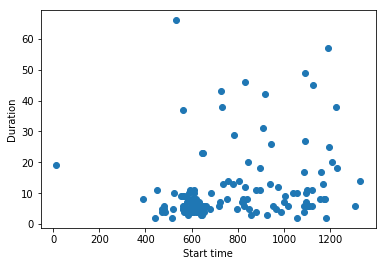

In [133]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(starts,durations)
plt.xlabel('Start time')
plt.ylabel('Duration')
print(len(starts))

In [134]:
from sklearn.cluster import KMeans

X = np.array([starts, durations]).T

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
center = kmeans.cluster_centers_

labels = kmeans.labels_

cluster1_indices = np.where(labels == 0)[0]
cluster2_indices = np.where(labels == 1)[0]

cluster1_data = []
for index in cluster1_indices:
    cluster1_data.append(X[index,:])
    
cluster2_data = []
for index in cluster2_indices:
    cluster2_data.append(list(X[index,:]))

cluster1_data = np.array(cluster1_data)
cluster2_data = np.array(cluster2_data)

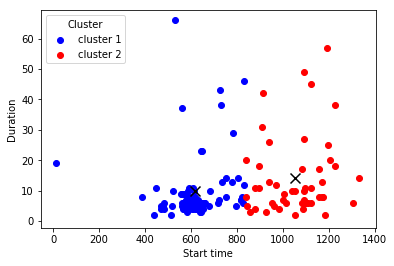

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(cluster1_data[:,0],cluster1_data[:,1],color ='blue',label='cluster 1')
plt.scatter(cluster2_data[:,0],cluster2_data[:,1],color = 'red',label='cluster 2')
plt.xlabel('Start time')
plt.ylabel('Duration')
plt.scatter(center[0,0],center[0,1],color='black',marker='x',s=100)
plt.scatter(center[1,0],center[1,1],color='black',marker='x',s=100)
plt.legend(title='Cluster')
plt.show()

In [136]:
mean_cluster1 = np.mean(cluster1_data,axis=0)
std_cluster1 = np.std(cluster1_data,axis=0)
print(mean_cluster1)
print(std_cluster1)

[619.12345679   9.88888889]
[118.75915899  10.64697256]


In [137]:
mean_cluster2 = np.mean(cluster2_data,axis=0)
std_cluster2 = np.std(cluster2_data,axis=0)
print(mean_cluster2)
print(std_cluster2)

[1054.08   14.22]
[124.7013777   12.72680636]


In [138]:
def classifier(data_point):
    start, duration = data_point
    # Cluster 1 mean and std for start time and duration
    mean_start1 = mean_cluster1[0]
    mean_duration1 = mean_cluster1[1]
    
    std_start1 = std_cluster1[0]
    std_duration1 = std_cluster1[1]
    
    # Cluster 2 mean and std for start time and duration
    mean_start2 = mean_cluster2[0]
    mean_duration2 = mean_cluster2[1]
    
    std_start2 = std_cluster2[0]
    std_duration2 = std_cluster2[1]
    
    if ((mean_start1 - 2*std_start1) <= start <= (mean_start1 + 2*std_start1)) and ((mean_duration1 - 2*std_duration1) <= duration <= (mean_duration1 + 2*std_duration1)):
        classlabel = 1
    elif ((mean_start2 - 2*std_start2) <= start <= (mean_start2 + 2*std_start2)) and ((mean_duration2 - 2*std_duration2) <= duration <= (mean_duration2 + 2*std_duration2)):  
        classlabel = 2
        
    else:
        classlabel = 0
    
    return classlabel


In [139]:
normal_starts = np.load('normal_starts.npy')
abnormal_starts = np.load('abnormal_starts.npy')
durations = np.load('durations.npy')

In [140]:
results_abnormal = []
for i in range(len(normal_starts)):
    results_abnormal.append(classifier((abnormal_starts[i],durations[i])))

In [141]:
results_normal = []
for i in range(len(normal_starts)):
    results_normal.append(classifier((normal_starts[i],durations[i])))

In [142]:
mis_counter = 0
results_abnormal = np.array(results_abnormal)
mis_counter += len(results_abnormal[results_abnormal != 0])
results_normal = np.array(results_normal)
mis_counter += len(results_normal[results_normal == 0])
accuracy = (len(abnormal_starts)*2 - mis_counter)/(len(abnormal_starts)*2)*100
#accuracy = (len(starts) - mis_counter)/len(starts)*100
print(accuracy)

61.111111111111114


In [143]:
len(abnormal_starts)

45

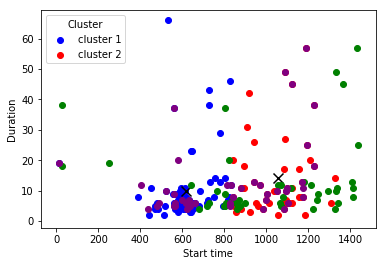

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(cluster1_data[:,0],cluster1_data[:,1],color ='blue',label='cluster 1')
plt.scatter(cluster2_data[:,0],cluster2_data[:,1],color = 'red',label='cluster 2')
plt.xlabel('Start time')
plt.ylabel('Duration')
plt.scatter(center[0,0],center[0,1],color='black',marker='x',s=100)
plt.scatter(center[1,0],center[1,1],color='black',marker='x',s=100)
plt.scatter(abnormal_starts,durations,color= 'green')
plt.scatter(normal_starts,durations,color='purple')
plt.legend(title='Cluster')
plt.show()

In [145]:
print(len(starts))
print(len(abnormal_starts))
print(len(durations))

131
45
45
